<a href="https://colab.research.google.com/github/r-avellar/masterclass-python-geodev/blob/main/masteclass-python-GeoDev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando pacotes


In [2]:
!pip install geopandas -q
!pip install folium -q
!pip install contextily -q


     |████████████████████████████████| 1.1 MB 5.2 MB/s 
     |████████████████████████████████| 16.6 MB 166 kB/s 
     |████████████████████████████████| 7.8 MB 40.9 MB/s 
     |████████████████████████████████| 20.9 MB 7.1 MB/s 
     |████████████████████████████████| 55 kB 4.4 MB/s 


# Importando bibliotecas


In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import contextily as cx
import pandas as pd

# Lendos os ARQUIVOS

In [4]:
data_sp = gpd.read_file("SP_Municipios_2020.shx")
data_sp.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3500105,Adamantina,SP,411.987,"POLYGON ((-51.05425 -21.40465, -51.05300 -21.4..."
1,3500204,Adolfo,SP,211.055,"POLYGON ((-49.65795 -21.20333, -49.65645 -21.2..."
2,3500303,Aguaí,SP,474.554,"POLYGON ((-46.97640 -21.96818, -46.97599 -21.9..."
3,3500402,Águas da Prata,SP,142.673,"POLYGON ((-46.73501 -21.81891, -46.73431 -21.8..."
4,3500501,Águas de Lindóia,SP,60.126,"POLYGON ((-46.60614 -22.44173, -46.60347 -22.4..."


In [5]:
data_monit = gpd.read_file("VWM_ESTACAO_ATIVA_REDEAUTOMATICA_QUALAR_PTOPoint.shp")
data_monit.head()

,Nome,Endereco,geometry
0,Santana,"AV SANTOS DUMONT, 1019",POINT (-46.62896 -23.50599)
1,Santo Amaro,"AV PE JOSE MARIA, 555",POINT (-46.71000 -23.65498)
2,Mauá,"R VITORINO D ANTONIA, S/N",POINT (-46.46600 -23.66855)
3,Cubatão-V.Parisi,"R PREF ARMANDO CUNHA, 70",POINT (-46.38868 -23.84942)
4,Sorocaba,"R NHONHO PIRES, 260",POINT (-47.47903 -23.50243)


# Mostrando tipo do dado

In [6]:
type(data_sp)

geopandas.geodataframe.GeoDataFrame

# Exibindo dados na tela

In [10]:
print("Quantidade de municípios em SP:", data_sp.shape[0])

Quantidade de municípios em SP: 645


#Exibindo tamanho dos dados

In [11]:
data_monit.shape

(63, 3)

In [12]:
data_sp.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

# transformar as coordenadas


In [13]:
data_monit.crs

<Bound CRS: GEOGCS["SIRGAS 2000",DATUM["Sistema_de_Referencia_ ...>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from SIRGAS 2000 to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: SIRGAS 2000

# Plotando as coordenadas dos mapas

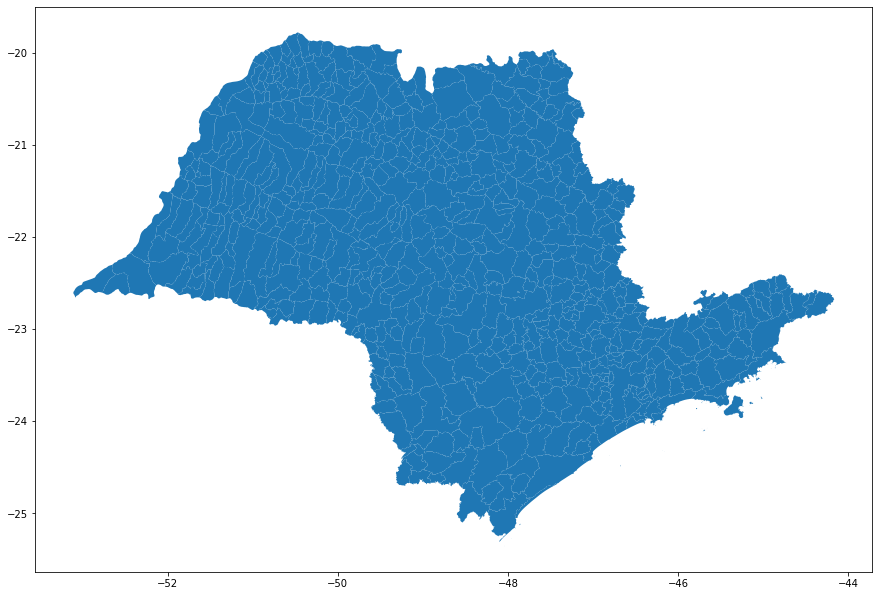

In [16]:
data_sp.plot(figsize=(15,15))

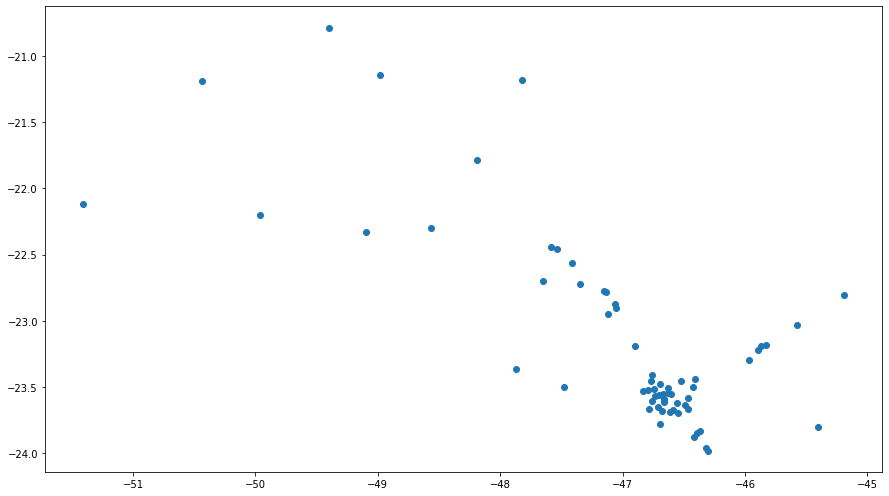

In [17]:
data_monit.plot(figsize=(15,15))

# Transformando as coordenadas de graus para EPSG:31983

In [18]:
data_monit_31983 = data_monit.to_crs("EPSG:31983")

In [19]:
data_monit_31983.crs

<Derived Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [20]:
data_monit_31983.head()

,Nome,Endereco,geometry
0,Santana,"AV SANTOS DUMONT, 1019",POINT (333675.000 7399522.000)
1,Santo Amaro,"AV PE JOSE MARIA, 555",POINT (325596.000 7382927.000)
2,Mauá,"R VITORINO D ANTONIA, S/N",POINT (350501.000 7381701.000)
3,Cubatão-V.Parisi,"R PREF ARMANDO CUNHA, 70",POINT (358583.000 7361752.000)
4,Sorocaba,"R NHONHO PIRES, 260",POINT (246841.000 7398675.000)


# Criando um buffer e transformar as coordenadas de points para polygon

In [21]:
data_monit_31983['geometry'] = data_monit_31983['geometry'].buffer(1000)

In [22]:
data_monit_31983.head()

,Nome,Endereco,geometry
0,Santana,"AV SANTOS DUMONT, 1019","POLYGON ((334675.000 7399522.000, 334670.185 7..."
1,Santo Amaro,"AV PE JOSE MARIA, 555","POLYGON ((326596.000 7382927.000, 326591.185 7..."
2,Mauá,"R VITORINO D ANTONIA, S/N","POLYGON ((351501.000 7381701.000, 351496.185 7..."
3,Cubatão-V.Parisi,"R PREF ARMANDO CUNHA, 70","POLYGON ((359583.000 7361752.000, 359578.185 7..."
4,Sorocaba,"R NHONHO PIRES, 260","POLYGON ((247841.000 7398675.000, 247836.185 7..."


# extraindo a cidade de sp e suas estaçoes de monitoramento

In [24]:
mun_sp = data_sp.loc[data_sp["NM_MUN"] == "São Paulo"]

In [25]:
mun_sp

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
562,3550308,São Paulo,SP,1521.11,"POLYGON ((-46.54624 -23.35791, -46.54585 -23.3..."


In [27]:
mun_sp.reset_index(drop=True, inplace=True)

In [28]:
mun_sp

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3550308,São Paulo,SP,1521.11,"POLYGON ((-46.54624 -23.35791, -46.54585 -23.3..."


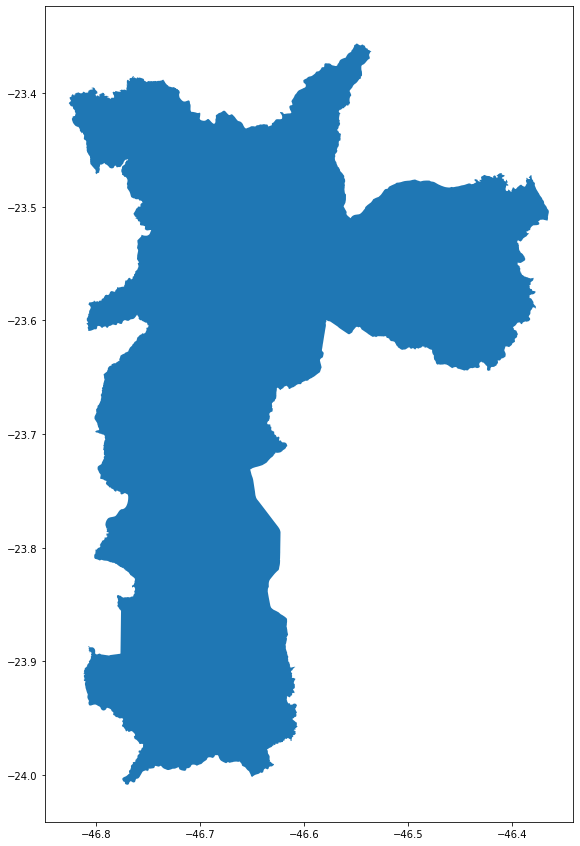

In [29]:
mun_sp.plot(figsize=(15,15))

In [30]:
mun_sp_31983 = mun_sp.to_crs("EPSG:31983")

In [31]:
mun_sp_31983

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,3550308,São Paulo,SP,1521.11,"POLYGON ((341946.176 7416013.104, 341986.159 7..."


In [32]:
mun_sp_31983.crs

<Derived Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [33]:
mask = data_monit_31983.within(mun_sp_31983.loc[0, 'geometry'])

In [35]:
mask

0      True
1      True
2     False
3     False
4     False
      ...  
58    False
59    False
60    False
61    False
62    False
Length: 63, dtype: bool

In [36]:
new_monit = data_monit_31983.loc[mask]

In [37]:
new_monit

,Nome,Endereco,geometry
0,Santana,"AV SANTOS DUMONT, 1019","POLYGON ((334675.000 7399522.000, 334670.185 7..."
1,Santo Amaro,"AV PE JOSE MARIA, 555","POLYGON ((326596.000 7382927.000, 326591.185 7..."
5,Parque D.Pedro II,"PRQ D PEDRO II, s/nº","POLYGON ((334855.000 7395221.000, 334850.185 7..."
6,Congonhas,"AL DOS TUPINIQUINS, 1571","POLYGON ((331293.000 7387264.000, 331288.185 7..."
7,Ibirapuera,"PRQ DO IBIRAPUERA, s/nº","POLYGON ((331545.000 7389978.000, 331540.185 7..."
8,Mooca,"R BRESSER, 2341","POLYGON ((337644.000 7394711.000, 337639.185 7..."
13,Cerqueira César,"AV DR ARNALDO, 725","POLYGON ((330269.000 7394205.000, 330264.185 7..."
15,Cid.Universitária-USP-Ipen,"AV PRF LINEU PRESTES, 2242","POLYGON ((323680.000 7392709.000, 323675.185 7..."
16,N.Senhora do Ó,"R CAP JOSE AMARAL, 80","POLYGON ((328198.000 7402315.000, 328193.185 7..."
17,Itaquera,"AV FERNANDO DO E STO A DE MATTOS, 1000","POLYGON ((351334.000 7391504.000, 351329.185 7..."


In [38]:
new_monit.reset_index(drop=True, inplace=True)

In [39]:
new_monit

,Nome,Endereco,geometry
0,Santana,"AV SANTOS DUMONT, 1019","POLYGON ((334675.000 7399522.000, 334670.185 7..."
1,Santo Amaro,"AV PE JOSE MARIA, 555","POLYGON ((326596.000 7382927.000, 326591.185 7..."
2,Parque D.Pedro II,"PRQ D PEDRO II, s/nº","POLYGON ((334855.000 7395221.000, 334850.185 7..."
3,Congonhas,"AL DOS TUPINIQUINS, 1571","POLYGON ((331293.000 7387264.000, 331288.185 7..."
4,Ibirapuera,"PRQ DO IBIRAPUERA, s/nº","POLYGON ((331545.000 7389978.000, 331540.185 7..."
5,Mooca,"R BRESSER, 2341","POLYGON ((337644.000 7394711.000, 337639.185 7..."
6,Cerqueira César,"AV DR ARNALDO, 725","POLYGON ((330269.000 7394205.000, 330264.185 7..."
7,Cid.Universitária-USP-Ipen,"AV PRF LINEU PRESTES, 2242","POLYGON ((323680.000 7392709.000, 323675.185 7..."
8,N.Senhora do Ó,"R CAP JOSE AMARAL, 80","POLYGON ((328198.000 7402315.000, 328193.185 7..."
9,Itaquera,"AV FERNANDO DO E STO A DE MATTOS, 1000","POLYGON ((351334.000 7391504.000, 351329.185 7..."


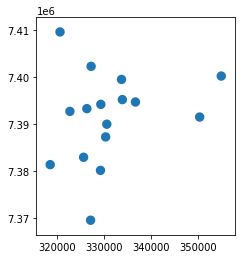

In [46]:
new_monit.plot()

In [42]:
new_monit['Area'] = new_monit.area
new_monit

/usr/local/lib/python3.8/dist-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,Nome,Endereco,geometry,Area
0,Santana,"AV SANTOS DUMONT, 1019","POLYGON ((334675.000 7399522.000, 334670.185 7...",3.136548e+06
1,Santo Amaro,"AV PE JOSE MARIA, 555","POLYGON ((326596.000 7382927.000, 326591.185 7...",3.136548e+06
2,Parque D.Pedro II,"PRQ D PEDRO II, s/nº","POLYGON ((334855.000 7395221.000, 334850.185 7...",3.136548e+06
3,Congonhas,"AL DOS TUPINIQUINS, 1571","POLYGON ((331293.000 7387264.000, 331288.185 7...",3.136548e+06
4,Ibirapuera,"PRQ DO IBIRAPUERA, s/nº","POLYGON ((331545.000 7389978.000, 331540.185 7...",3.136548e+06
5,Mooca,"R BRESSER, 2341","POLYGON ((337644.000 7394711.000, 337639.185 7...",3.136548e+06
6,Cerqueira César,"AV DR ARNALDO, 725","POLYGON ((330269.000 7394205.000, 330264.185 7...",3.136548e+06
7,Cid.Universitária-USP-Ipen,"AV PRF LINEU PRESTES, 2242","POLYGON ((323680.000 7392709.000, 323675.185 7...",3.136548e+06
8,N.Senhora do Ó,"R CAP JOSE AMARAL, 80","POLYGON ((328198.000 7402315.000, 328193.185 7...",3.136548e+06
9,Itaquera,"AV FERNANDO DO E STO A DE MATTOS, 1000","POLYGON ((351334.000 7391504.000, 351329.185 7...",3.136548e+06


In [43]:
new_monit.to_file("estacoes_monit_ar_sp.shp")

In [44]:
mun_sp_31983.to_file("mun_sp_31983.shp")

# Plotando o mapa estático com as estações

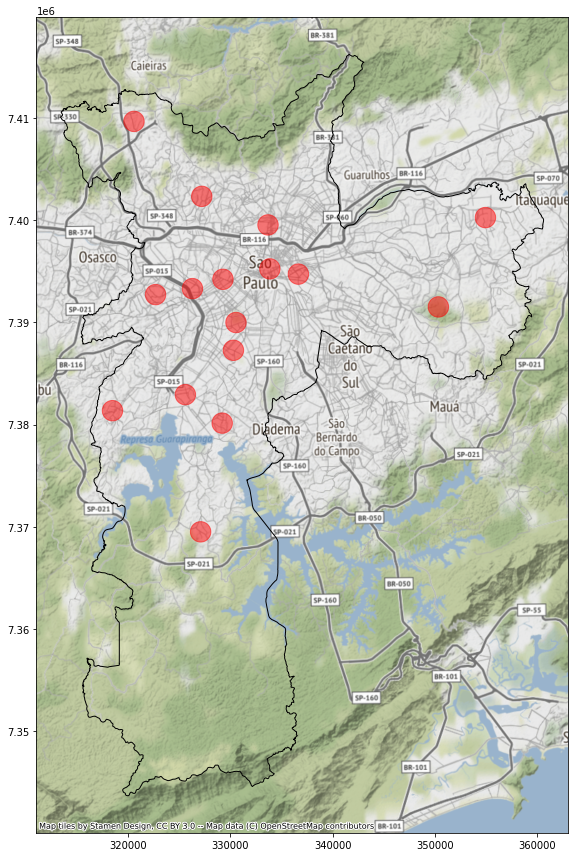

In [50]:
ax = mun_sp_31983.plot(figsize=(15,15), edgecolor='black' ,color='None')
new_monit.plot(ax=ax,  edgecolor='red' ,color='red', alpha=0.5)
cx.add_basemap(ax, crs=mun_sp_31983.crs)

# Plotagem mapa interativo

In [55]:
m = folium.Map(location=[-23.54, -46.72], zoom_start=10) #esses valores são pra centralizar o mapa em são paulo

for i, row in data_monit.iterrows():
  folium.Marker([row['geometry'].y, row['geometry'].x], popup=row["Nome"]).add_to(m)

m